# ERA5 variables

## Compare different wind stress variables
Data January 2020 - downloaded resampled to daily resolution with 1-hourly (res for resampling) [Data Link](https://cds.climate.copernicus.eu/apps/user-apps/app-c3s-daily-era5-statistics?dataset=reanalysis-era5-single-levels&product_type=reanalysis&variable_e5sl=eastward_turbulent_surface_stress&pressure_level_e5sl=-&statistic=daily_mean&year_e5sl=2020&month=01&frequency=1-hourly&time_zone=UTC%2B00:00&grid_e5=0.25/0.25&area.lat:record:list:float=36&area.lat:record:list:float=45&area.lon:record:list:float=-20&area.lon:record:list:float=-5)

- TSS: Turbulent surface stress $\frac{N}{m^2 s}$ 
- TMSS: Mean turbulent surface stress $\frac{N}{m^2}$ 
- TISS: Instantaneous turbulent surface stress $\frac{N}{m^2}$

## Compare ERA5 mean turbulent surface stress to 10m wind

- Data 2020 - downloaded resampled to daily resolution with 1-hourly (res for resampling) [Data Link](https://cds.climate.copernicus.eu/apps/user-apps/app-c3s-daily-era5-statistics?dataset=reanalysis-era5-single-levels&product_type=reanalysis&variable_e5sl=eastward_turbulent_surface_stress&pressure_level_e5sl=-&statistic=daily_mean&year_e5sl=2020&month=01&frequency=1-hourly&time_zone=UTC%2B00:00&grid_e5=0.25/0.25&area.lat:record:list:float=36&area.lat:record:list:float=45&area.lon:record:list:float=-20&area.lon:record:list:float=-5)
- Units: $\frac{N}{m^2}$
- Compare to the surface stress calculated from the 10m wind components (2020) ... also from ERA5

In [1]:
## import packages
%matplotlib inline
import xarray as xr
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import os
from global_land_mask import globe
import my_functions

## Compare different wind stress variables

In [2]:
## import data
os.chdir("/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/Data.nosync/")

TSS = xr.merge([xr.open_dataset(f) for f in glob.glob('Surface_stress/Turbulent/*2020_01.nc')])
TMSS = xr.merge([xr.open_dataset(f) for f in glob.glob('Surface_stress/Turbulent_mean/*2020_01.nc')])
TISS = xr.merge([xr.open_dataset(f) for f in glob.glob('Surface_stress/Turbulent_instantaneous/*2020_01.nc')])

In [3]:
print('Mean [N m^-2]')
print(f'min eastward: {"{:.2f}".format(np.min(TMSS.metss.values))} max eastward: {"{:.2f}".format(np.max(TMSS.metss.values))}')
print(f'min northward: {"{:.2f}".format(np.min(TMSS.mntss.values))} max northward: {"{:.2f}".format(np.max(TMSS.mntss.values))} \n')

print('Instantaneous [N m^-2]')
print(f'min eastward: {"{:.2f}".format(np.min(TISS.iews.values))} max eastward: {"{:.2f}".format(np.max(TISS.iews.values))}')
print(f'min northward: {"{:.2f}".format(np.min(TISS.inss.values))} max northward: {"{:.2f}".format(np.max(TISS.inss.values))} \n')

print('Turbulent [N m^-2 s]')
print(f'min eastward: {"{:.2f}".format(np.min(TSS.ewss.values))} max eastward: {"{:.2f}".format(np.max(TSS.ewss.values))}')
print(f'min northward: {"{:.2f}".format(np.min(TSS.nsss.values))} max northward: {"{:.2f}".format(np.max(TSS.nsss.values))}')


Mean [N m^-2]
min eastward: -3.07 max eastward: 2.00
min northward: -3.91 max northward: 3.72 

Instantaneous [N m^-2]
min eastward: -2.97 max eastward: 1.93
min northward: -3.89 max northward: 3.66 

Turbulent [N m^-2 s]
min eastward: -10883.15 max eastward: 7260.73
min northward: -14609.36 max northward: 13224.49


### Plot

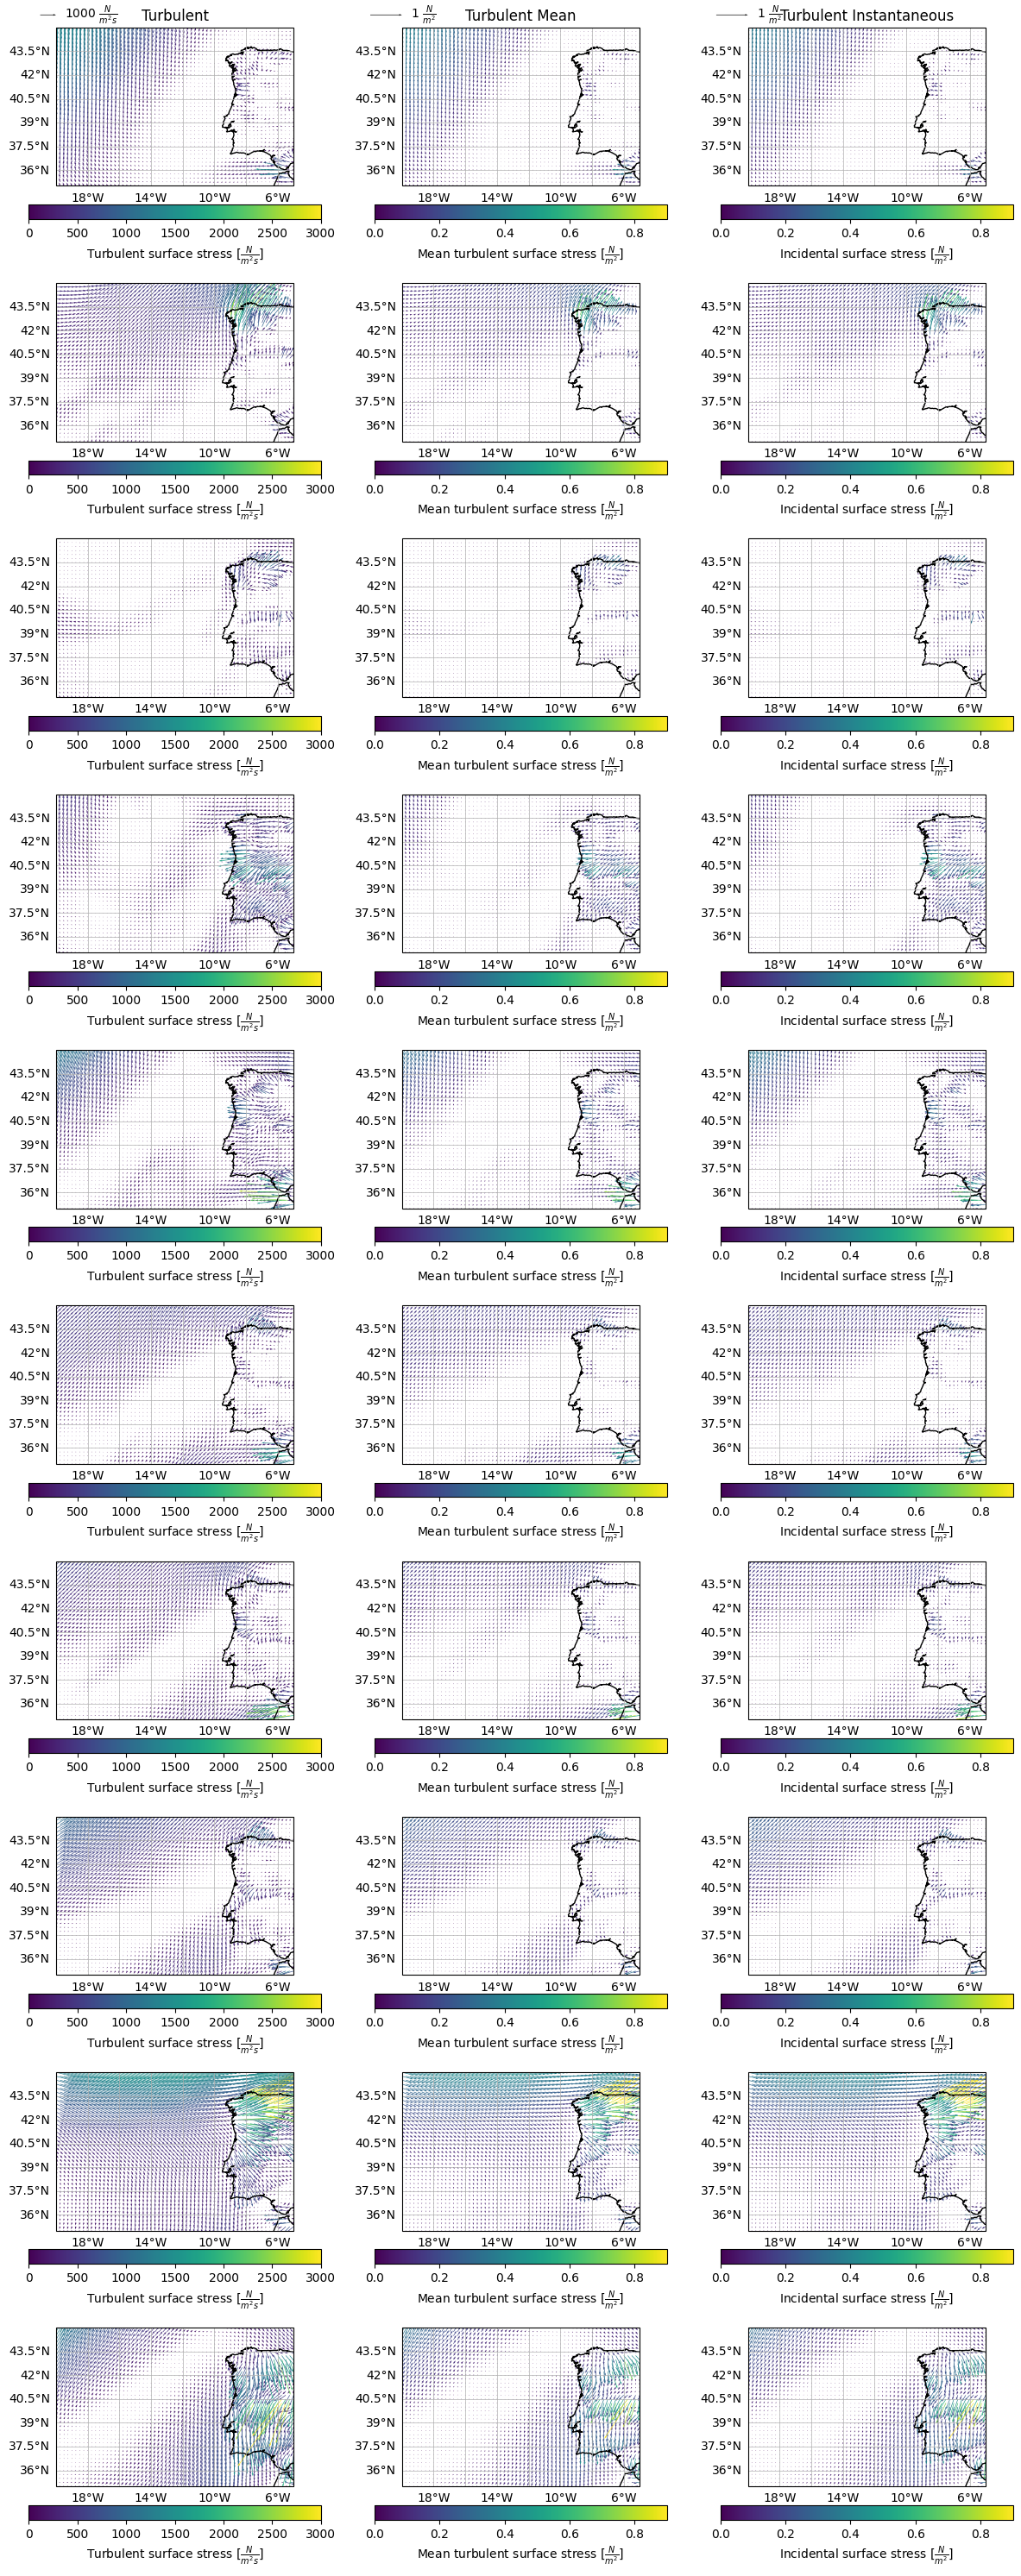

In [4]:
fig, ax = plt.subplots(10, 3, figsize = (12,30), subplot_kw={'projection': ccrs.PlateCarree()})

for r in np.arange(0, 10):
    for c in np.arange(0, 3):
        ax[r,c].set_extent([-20, -5, 45, 35])
        ax[r,c].coastlines()
        gls = ax[r,c].gridlines(draw_labels=True, linewidth = 0.5)
        gls.top_labels = False 
        gls.right_labels = False              

for r in np.arange(0, 10):
    ax[0,0].set_title('Turbulent')
    M1 = np.hypot(TSS.ewss.isel(time = r), TSS.nsss.isel(time = r))
    im1 = ax[r,0].quiver(TSS.lon, TSS.lat, TSS.ewss.isel(time = r), TSS.nsss.isel(time = r), 
                         M1, clim = [0, 3000],
                         angles='xy', scale_units='xy', scale=1000) 

    ax[0,1].set_title('Turbulent Mean')
    M2 = np.hypot(TMSS.metss.isel(time = r), TMSS.mntss.isel(time = r))
    im2 = ax[r,1].quiver(TMSS.lon, TMSS.lat, TMSS.metss.isel(time = r), TMSS.mntss.isel(time = r), 
                         M2, clim = [0, 0.9],
                         angles='xy', scale_units='xy', scale=0.5)

    ax[0,2].set_title('Turbulent Instantaneous')
    M3 = np.hypot(TISS.iews.isel(time = r), TISS.inss.isel(time = r))
    im3 = ax[r,2].quiver(TISS.lon, TISS.lat, TISS.iews.isel(time = r), TISS.inss.isel(time = r), 
                         M3, clim = [0, 0.9], 
                         angles='xy', scale_units='xy', scale=0.5)

    if r == 0:
        qk1 = ax[0,0].quiverkey(im1, 0, 1.08, 1000, r'1000 $\frac{N}{m^2 s}$', labelpos='E')
        qk2 = ax[0,0].quiverkey(im2, 0, 1.08, 1, r'1 $\frac{N}{m^2}$', labelpos='E')
        qk3 = ax[0,0].quiverkey(im3, 0, 1.08, 1, r'1 $\frac{N}{m^2}$', labelpos='E')

    plt.colorbar(im1, ax = ax[r,0], label = r'Turbulent surface stress [$\frac{N}{m^2 s}$]', pad = 0.09, orientation = 'horizontal');
    plt.colorbar(im2, ax = ax[r,1], label = r'Mean turbulent surface stress [$\frac{N}{m^2}$]', pad = 0.09, orientation = 'horizontal');
    plt.colorbar(im3, ax = ax[r,2], label = r'Incidental surface stress [$\frac{N}{m^2}$]', pad = 0.09, orientation = 'horizontal');

fig.tight_layout()
plt.show()
fig.savefig('../Iberian_Coast_Upwelling/Figures/ERA5_sufrace_stress_vars.png', dpi = 300)

In [5]:
## look at the differences between the datasets

# TMSS - TISS
TSM_wind_vec = np.hypot(TMSS.metss, TMSS.mntss)
TSI_wind_vec = np.hypot(TISS.iews, TISS.inss)

TSM_minus_TSI = TSM_wind_vec - TSI_wind_vec
TSM_devided_TSI = TSM_wind_vec - TSI_wind_vec

# TSS / TMSS
TS_wind_vec = np.hypot(TSS.ewss, TSS.nsss)

TS_devided_TSM = TS_wind_vec / TSM_wind_vec

# TSS / TISS
TS_devided_TSI = TS_wind_vec / TSI_wind_vec


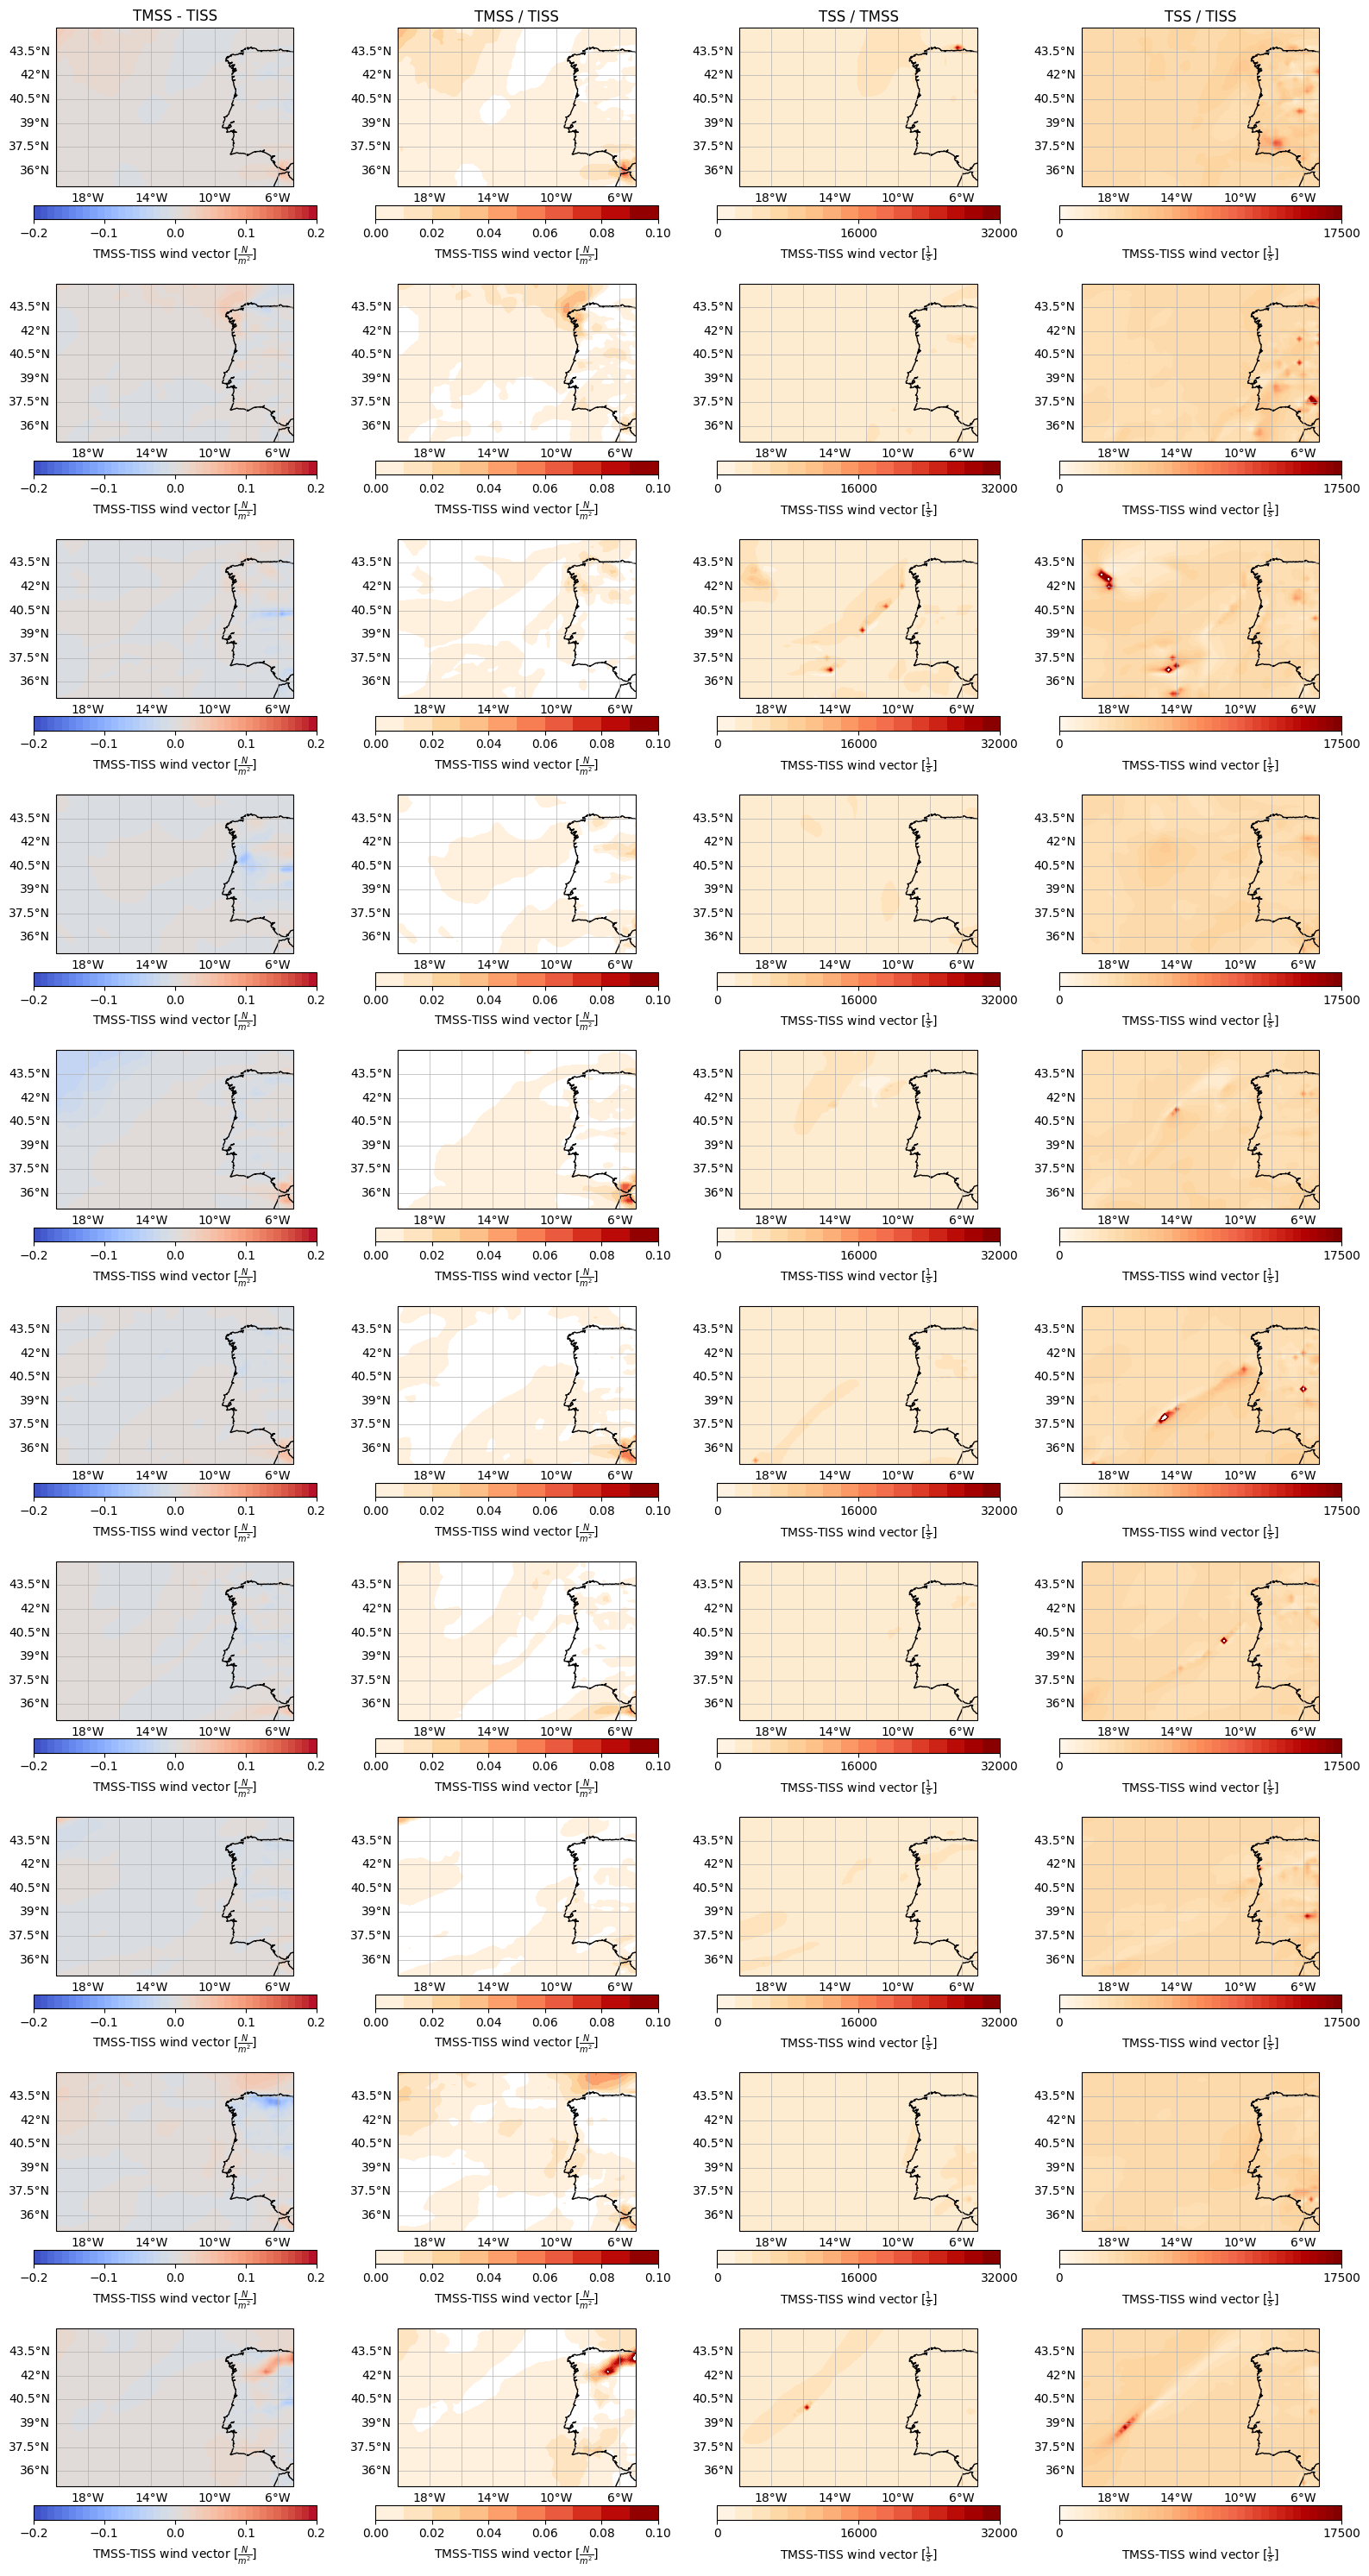

In [6]:
## plot comarison

## plot

fig, ax = plt.subplots(10, 4, figsize = (16,30), subplot_kw={'projection': ccrs.PlateCarree()})

for r in np.arange(0, 10):
    for c in np.arange(0, 4):
        ax[r,c].set_extent([-20, -5, 45, 35])
        ax[r,c].coastlines()
        gls = ax[r,c].gridlines(draw_labels=True, linewidth = 0.5)
        gls.top_labels = False 
        gls.right_labels = False              

for r in np.arange(0, 10):
    ax[0,0].set_title('TMSS - TISS')
    im1 = ax[r,0].contourf(TSS.lon, TSS.lat, TSM_minus_TSI.isel(time = r), transform = ccrs.PlateCarree(), cmap='coolwarm', 
                           levels = np.arange(-0.2,0.21,0.01))

    ax[0,1].set_title('TMSS / TISS')
    im2 = ax[r,1].contourf(TSS.lon, TSS.lat, TSM_devided_TSI.isel(time = r), transform = ccrs.PlateCarree(), cmap='OrRd', 
                           levels = np.arange(0,0.11,0.01))
    
    ax[0,2].set_title('TSS / TMSS')
    im3 = ax[r,2].contourf(TSS.lon, TSS.lat, TS_devided_TSM.isel(time = r), transform = ccrs.PlateCarree(), cmap='OrRd', 
                           levels = np.arange(0,34000,2000))

    ax[0,3].set_title('TSS / TISS')
    im4 = ax[r,3].contourf(TSS.lon, TSS.lat, TS_devided_TSI.isel(time = r), transform = ccrs.PlateCarree(), cmap='OrRd', 
                           levels = np.arange(0,18000,500))


    plt.colorbar(im1, ax = ax[r,0], label = r'TMSS-TISS wind vector [$\frac{N}{m^2}$]', 
                 pad = 0.09, orientation = 'horizontal', ticks = np.arange(-0.2,0.3,0.1));
    plt.colorbar(im2, ax = ax[r,1], label = r'TMSS-TISS wind vector [$\frac{N}{m^2}$]', 
                 pad = 0.09, orientation = 'horizontal', ticks = np.arange(0,0.12,0.02));
    plt.colorbar(im3, ax = ax[r,2], label = r'TMSS-TISS wind vector [$\frac{1}{s}$]', 
                 pad = 0.09, orientation = 'horizontal', ticks = np.arange(0,48000,16000));
    plt.colorbar(im4, ax = ax[r,3], label = r'TMSS-TISS wind vector [$\frac{1}{s}$]', 
                 pad = 0.09, orientation = 'horizontal', ticks = np.arange(0,25000,17500));

fig.tight_layout()
fig.savefig('../Iberian_Coast_Upwelling/Figures/ERA5_compare_datasets_1.png', dpi = 300)

## Compare ERA5 mean turbulent surface stress to 10m wind

In [7]:
# load data
MTSS_all = xr.open_dataset('MTSS.nc')
MTSS_weekly_mean = xr.open_dataset('MTSS_weekly.nc')
MTSS_weekly_std = xr.open_dataset('MTSS_weekly_std.nc')

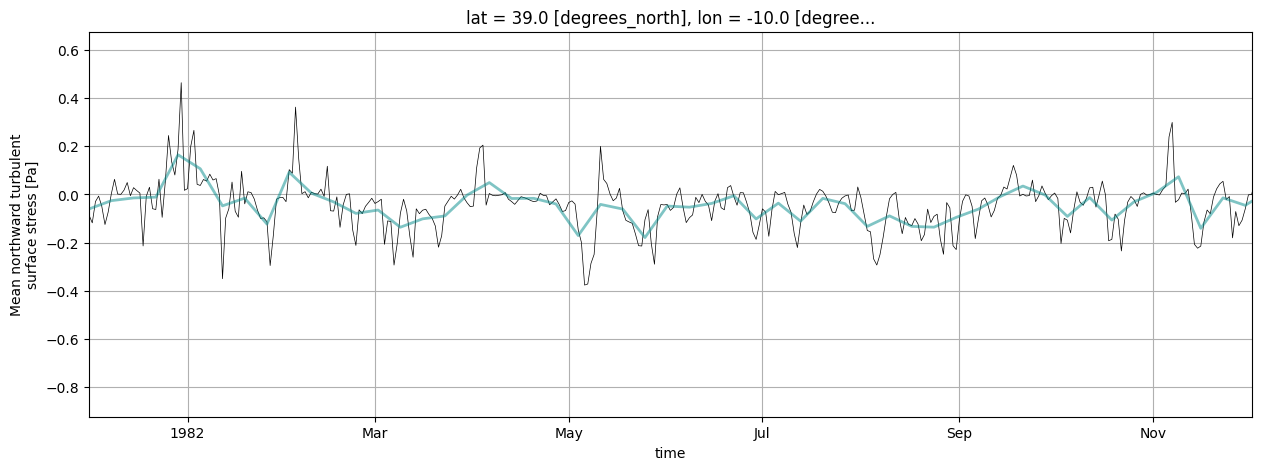

In [8]:
fig = plt.figure(figsize = (15,5))
MTSS_all.mntss.sel(lon = -10, lat = 39).plot(color = 'k', linewidth = 0.5, xlim = (MTSS_all.time[0], MTSS_all.time[366]))
MTSS_weekly_mean.mntss.sel(lon = -10, lat = 39).plot(color = 'darkcyan', linewidth = 2, alpha = 0.5)
plt.grid()

### Example 2020

In [9]:
## subset data
MTSS_weekly_mean_20 = MTSS_weekly_mean.sel(time = slice ("2020-01-01", "2020-12-31"))
MTSS_weekly_std_20 = MTSS_weekly_std.sel(time = slice ("2020-01-01", "2020-12-31"))

In [10]:
## upwelling index
MTSS_weekly_mean_20 = my_functions.calc_upwelling_index(MTSS_weekly_mean_20, MTSS_weekly_mean_20.lat, MTSS_weekly_mean_20.lon, MTSS_weekly_mean_20.metss, MTSS_weekly_mean_20.mntss)

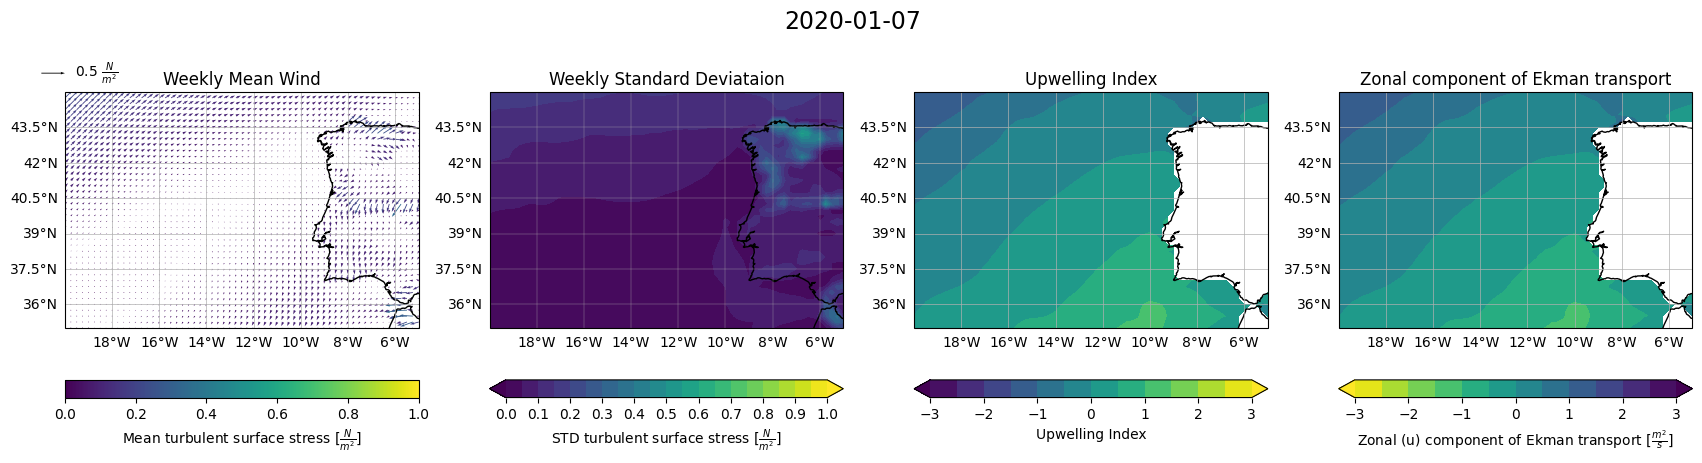

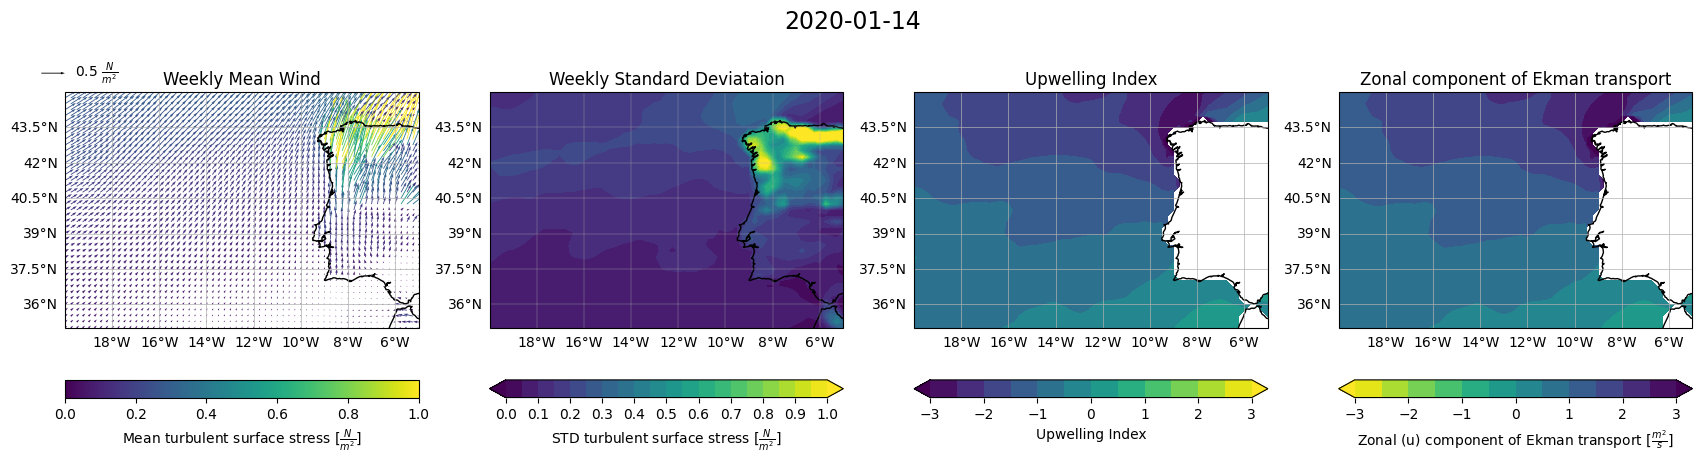

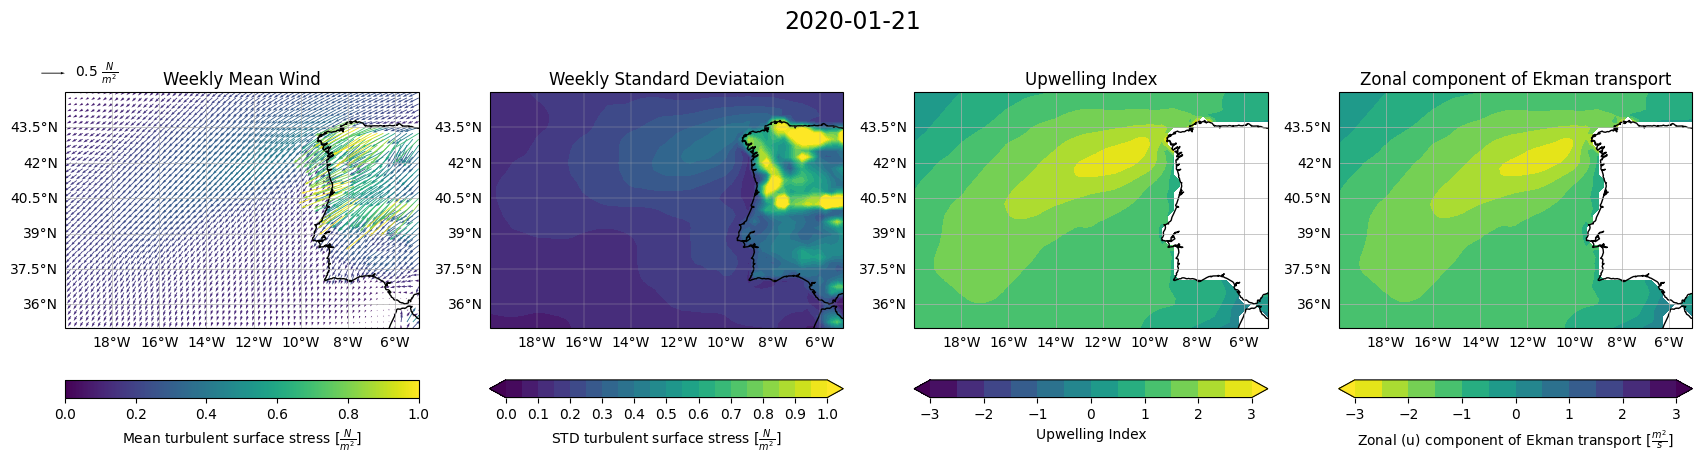

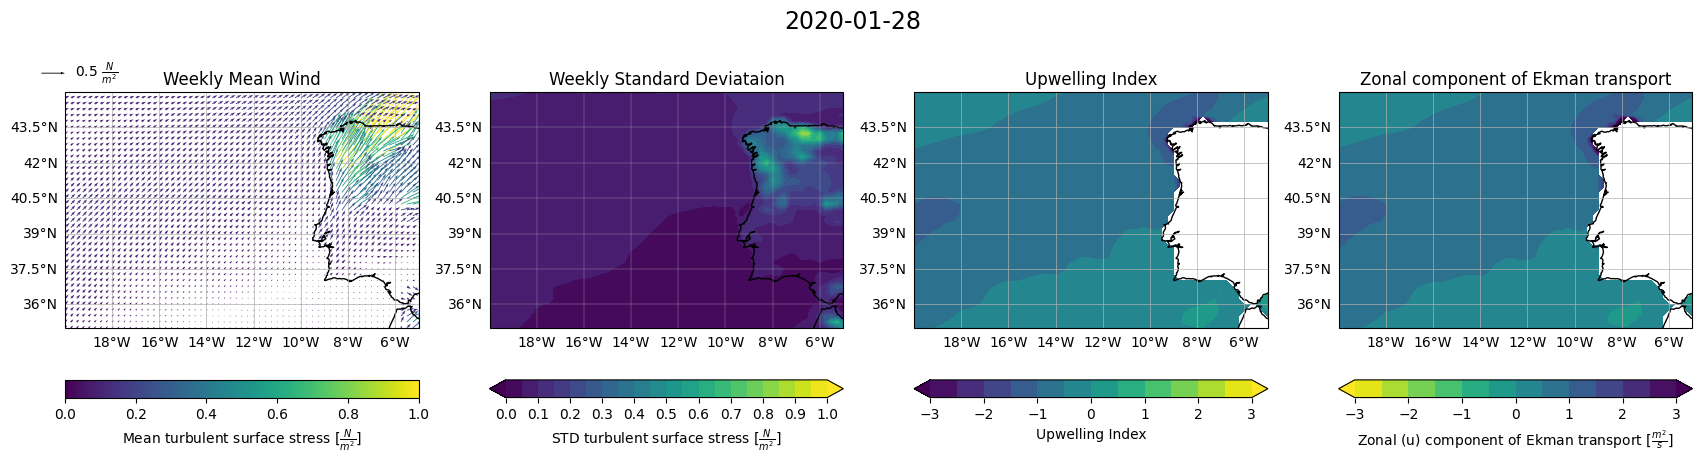

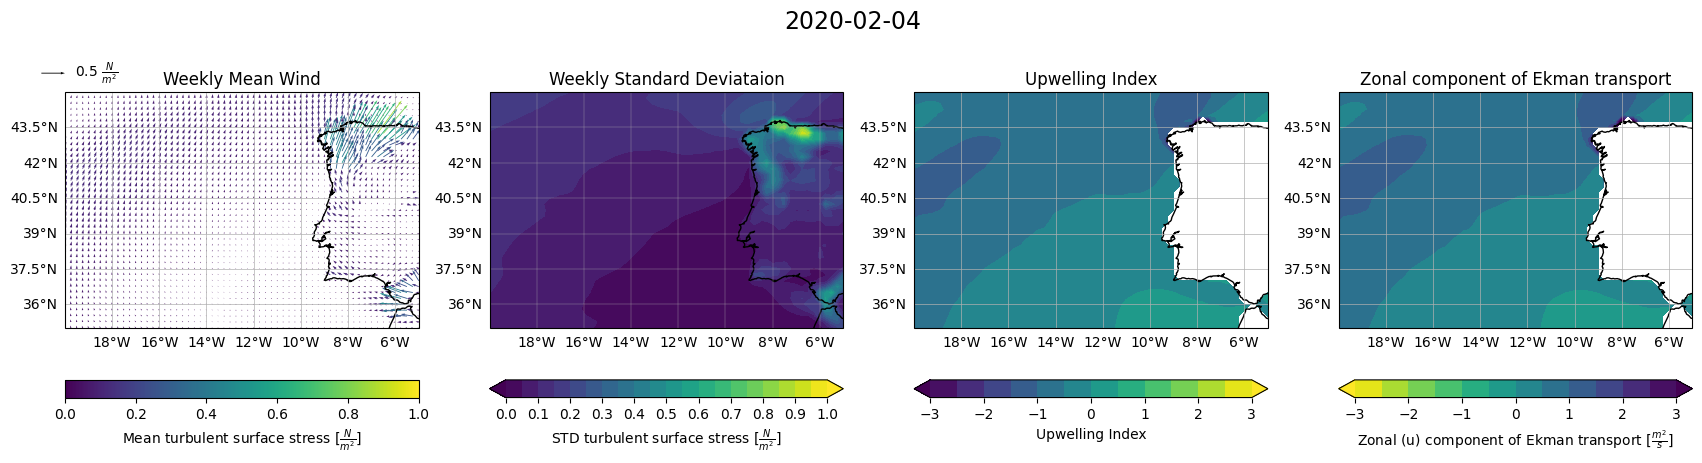

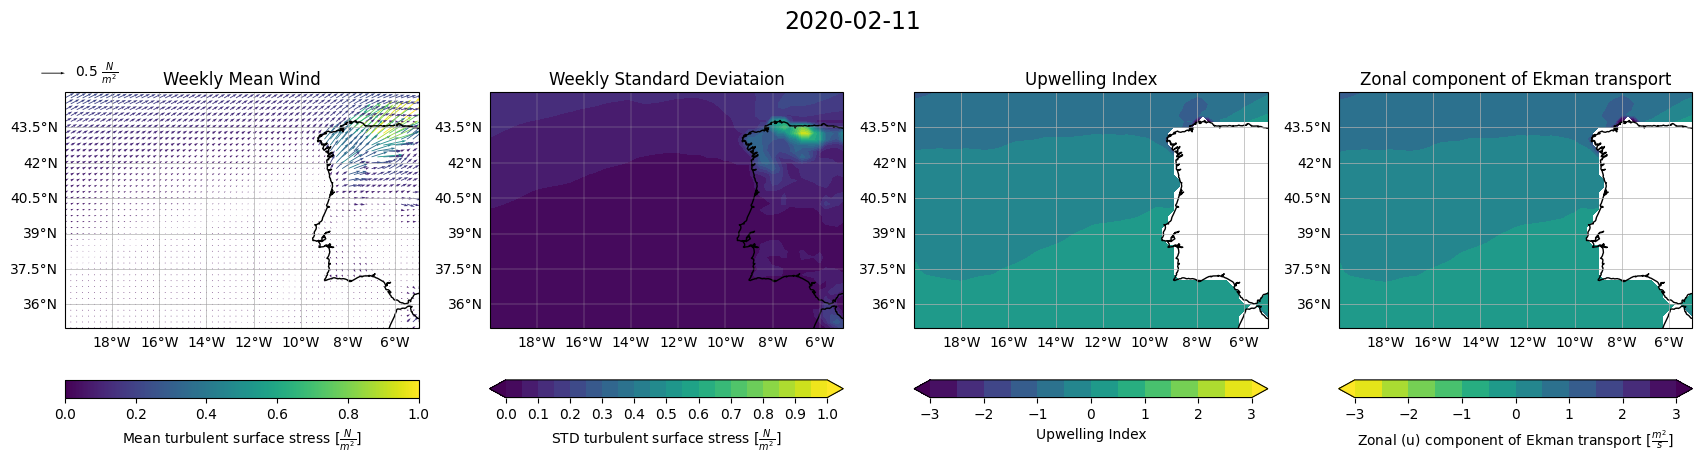

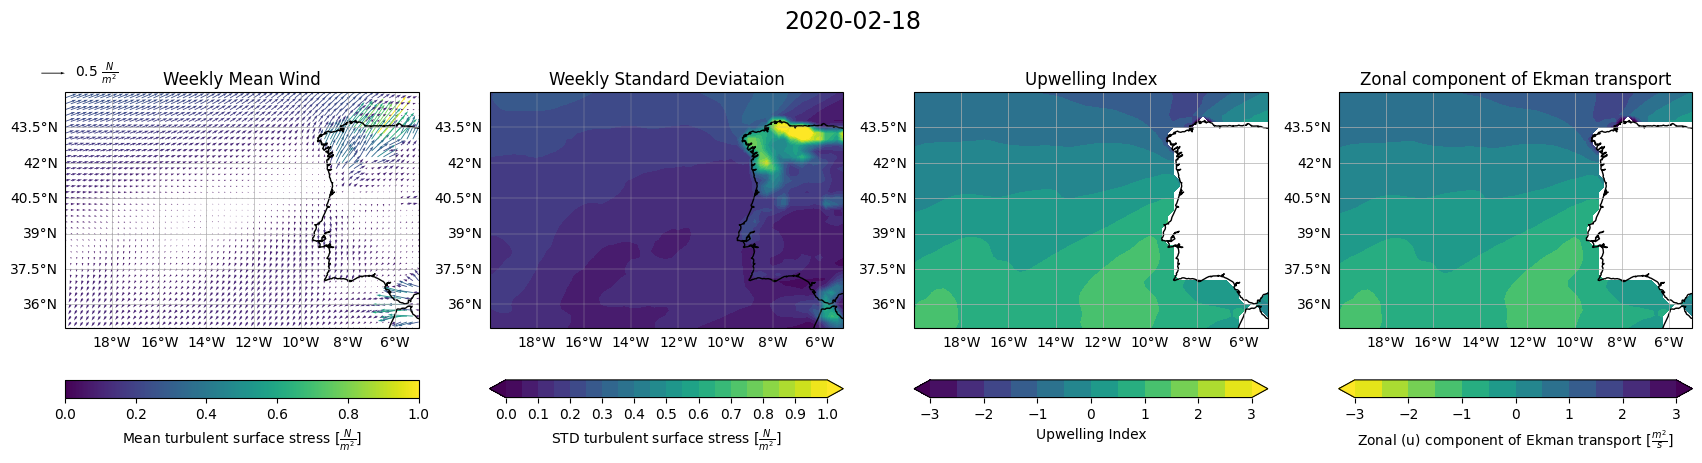

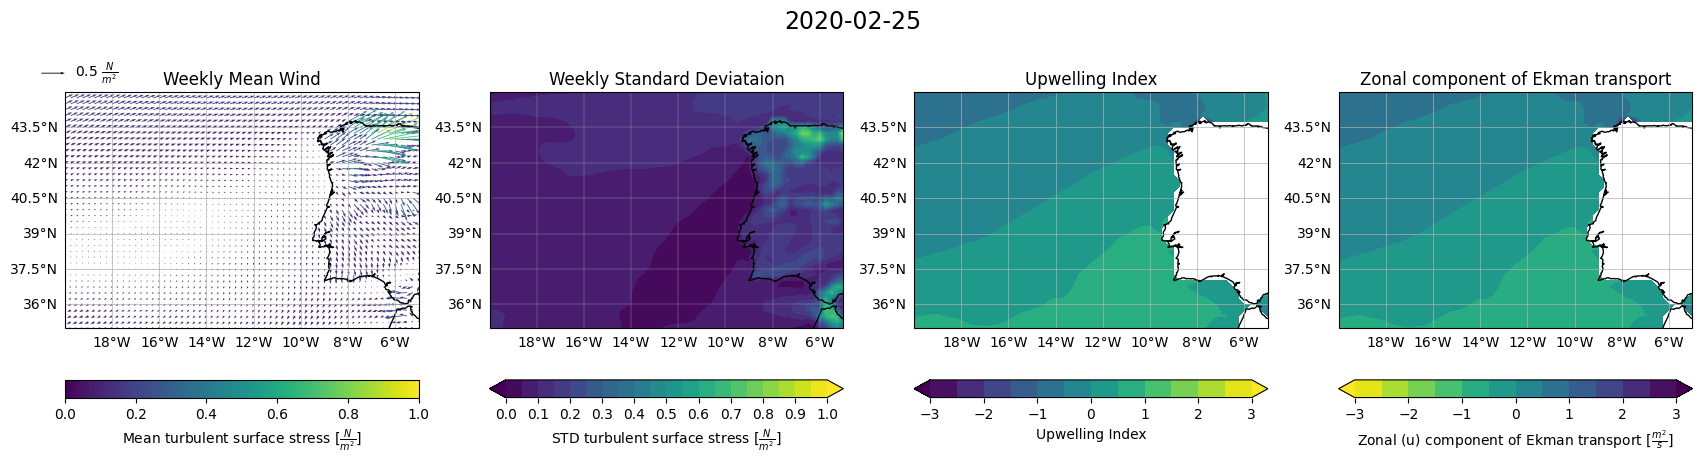

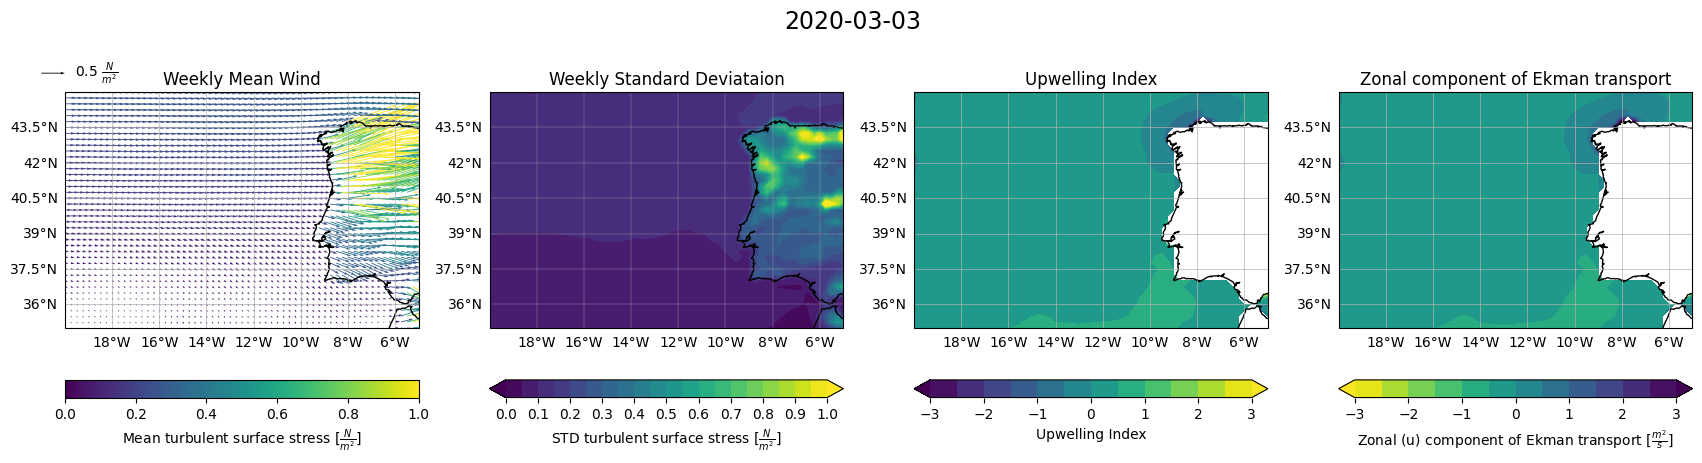

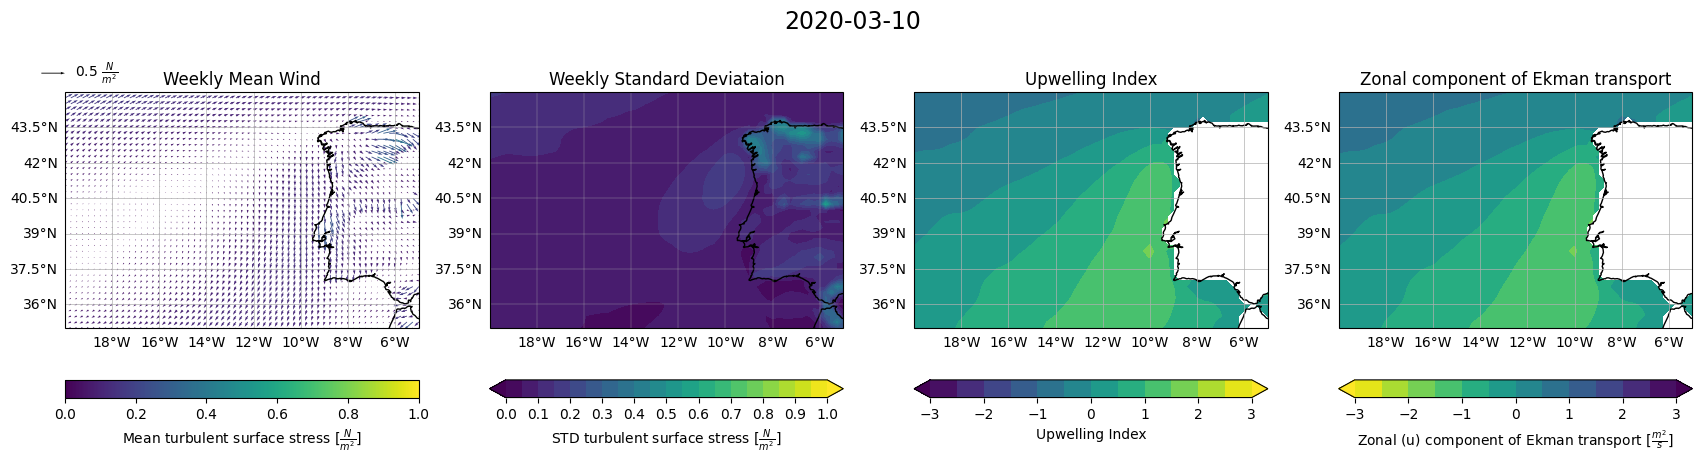

In [19]:
### plot 
for i in np.arange(0, 10, 1): #len(MTSS_weekly_mean_20.time.values), 1):
    fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, figsize = (21, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # set up cartopy
    ax1.set_extent([-20, -5, 45, 35])
    ax1.coastlines()
    gls = ax1.gridlines(draw_labels=True, linewidth = 0.5)
    gls.top_labels = False 
    gls.right_labels = False
    # plot data
    col = np.hypot(MTSS_weekly_mean_20.metss.isel(time = i), MTSS_weekly_mean_20.mntss.isel(time = i))
    im1 = ax1.quiver(MTSS_weekly_mean_20.lon, MTSS_weekly_mean_20.lat, MTSS_weekly_mean_20.metss.isel(time = i), MTSS_weekly_mean_20.mntss.isel(time = i), 
                     col, clim = [0,1], 
                     angles='xy', scale_units='xy', scale = 0.5)
    ax1.set_title('Weekly Mean Wind')
    plt.colorbar(im1, orientation = 'horizontal', label = r'Mean turbulent surface stress [$\frac{N}{m^2}$]', fraction = 0.06)
    qk1 = ax1.quiverkey(im1, 0, 1.08, 0.5, r'0.5 $\frac{N}{m^2}$', labelpos='E')
    
    # set up cartopy
    ax2.set_extent([-20, -5, 45, 35])
    ax2.coastlines()
    gls = ax2.gridlines(draw_labels=True, linewidth = 0.25)
    gls.top_labels = False 
    gls.right_labels = False
    # plot std as function the length of the hypothenuse -> combine the vectors
    dat = np.hypot(MTSS_weekly_std_20.metss.isel(time = i), MTSS_weekly_std_20.mntss.isel(time = i))
    im2 = ax2.contourf(MTSS_weekly_std_20.lon, MTSS_weekly_std_20.lat, dat, transform = ccrs.PlateCarree(), levels = np.arange(0, 1.05, 0.05), extend = 'both')
    ax2.set_title('Weekly Standard Deviataion')
    #ax2.quiver(MTSS_weekly_std_20.lon, MTSS_weekly_std_20.lat, MTSS_weekly_std_20.metss.isel(time = i), MTSS_weekly_std_20.mntss.isel(time = i)) # if I wanted to preserver information on direction I'd have to plot this
    plt.colorbar(im2, orientation = 'horizontal', label = r'STD turbulent surface stress [$\frac{N}{m^2}$]', fraction = 0.06, ticks = np.arange(0, 1.1, 0.1))

    # set up cartopy
    ax3.set_extent([-20, -5, 45, 35])
    ax3.coastlines()
    gls = ax3.gridlines(draw_labels=True, linewidth = 0.5)
    gls.top_labels = False 
    gls.right_labels = False
    # plot data
    im3 = ax3.contourf(MTSS_weekly_mean_20.lon, MTSS_weekly_mean_20.lat, MTSS_weekly_mean_20.UI.where(MTSS_weekly_mean_20.lsm).isel(time = i), 
                       transform = ccrs.PlateCarree(), levels = np.arange(-3, 3.5, 0.5), extend = 'both')
    ax3.set_title('Upwelling Index')
    plt.colorbar(im3, orientation = 'horizontal', label = r'Upwelling Index', fraction = 0.06, ticks = np.arange(-3, 4, 1))

    # set up cartopy
    ax4.set_extent([-20, -5, 45, 35])
    ax4.coastlines()
    gls = ax4.gridlines(draw_labels=True, linewidth = 0.5)
    gls.top_labels = False 
    gls.right_labels = False
    # plot data
    im4 = ax4.contourf(MTSS_weekly_mean_20.lon, MTSS_weekly_mean_20.lat, MTSS_weekly_mean_20.ek_trans_u.where(MTSS_weekly_mean_20.lsm).isel(time = i), 
                       transform = ccrs.PlateCarree(), levels = np.arange(-3, 3.5, 0.5), extend = 'both', cmap = 'viridis_r')
    ax4.set_title('Zonal component of Ekman transport')
    plt.colorbar(im4, orientation = 'horizontal', label = r'Zonal (u) component of Ekman transport [$\frac{m^2}{s}$]', fraction = 0.06, ticks = np.arange(-3, 4, 1))
    
    fig.suptitle(f'{str(MTSS_weekly_mean_20.time[i].values)[0:10]}', fontsize = 17);
    #fig.tight_layout()


## Compare mean wind stress to wind stress derived from wind speed at 10m
use 2020 as an example

In [39]:
## load wind speed data for 2020
Wind10_20 = xr.merge([xr.open_dataset(f) for f in glob.glob("Surface_stress/Wind_10m/*.nc")])
Wind10_20 = Wind10_20.drop_vars(["realization"])

In [41]:
## resample to weekly res
Wind10_20_weekly_mean = Wind10_20.resample(time = 'W-SAT', closed = 'left', label = 'left').mean() 
Wind10_20_weekly_mean['time'] = Wind10_20_weekly_mean.time + np.timedelta64(3, 'D')

In [42]:
## calculate the wind stress on the ocean surface from the wind speed at 10m
# from Lecture 7 & Bakun
# variables 
rho_air = 1.2 # density of air [kg/m^3] 
C_D = 1.45e-3 # drag coefficient [dimensionless] # could be calculated as function of wind speed Ferreira et al. 2022
u = Wind10_20_weekly_mean.u10 # wind speed in u direction [m/s]
v = Wind10_20_weekly_mean.v10 # wind speed in v direction [m/s]

Wind10_20_weekly_mean['v_stress'] = rho_air * C_D * np.sqrt(u**2 + v**2) * v
Wind10_20_weekly_mean['u_stress'] = rho_air * C_D * np.sqrt(u**2 + v**2) * u

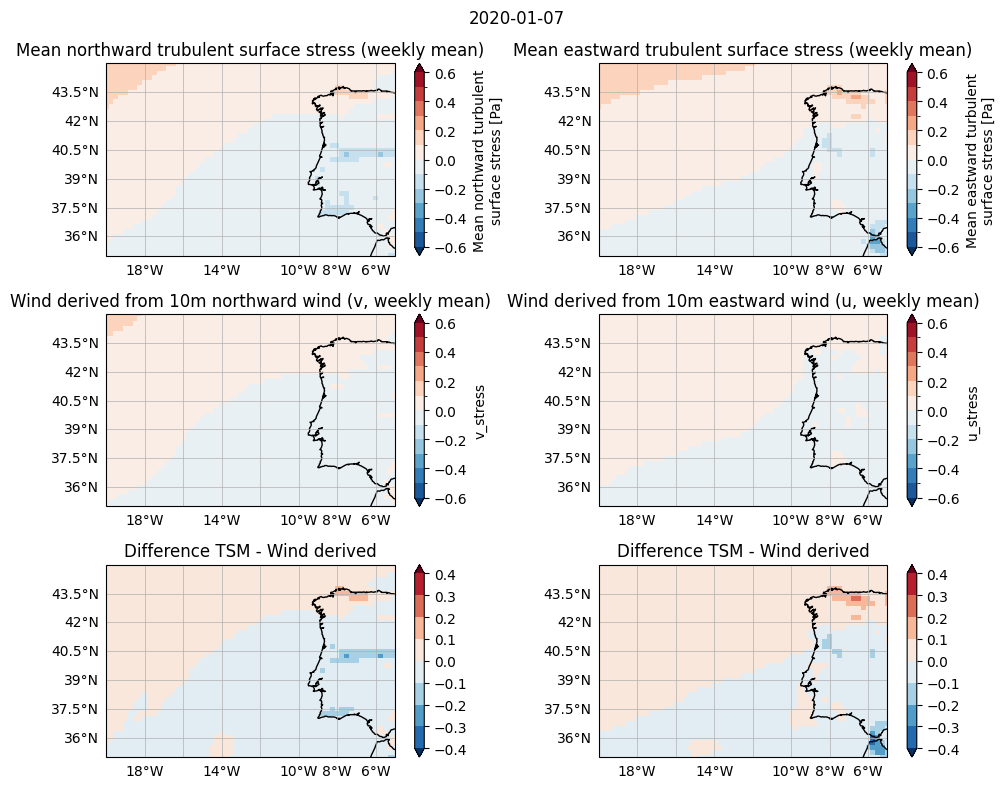

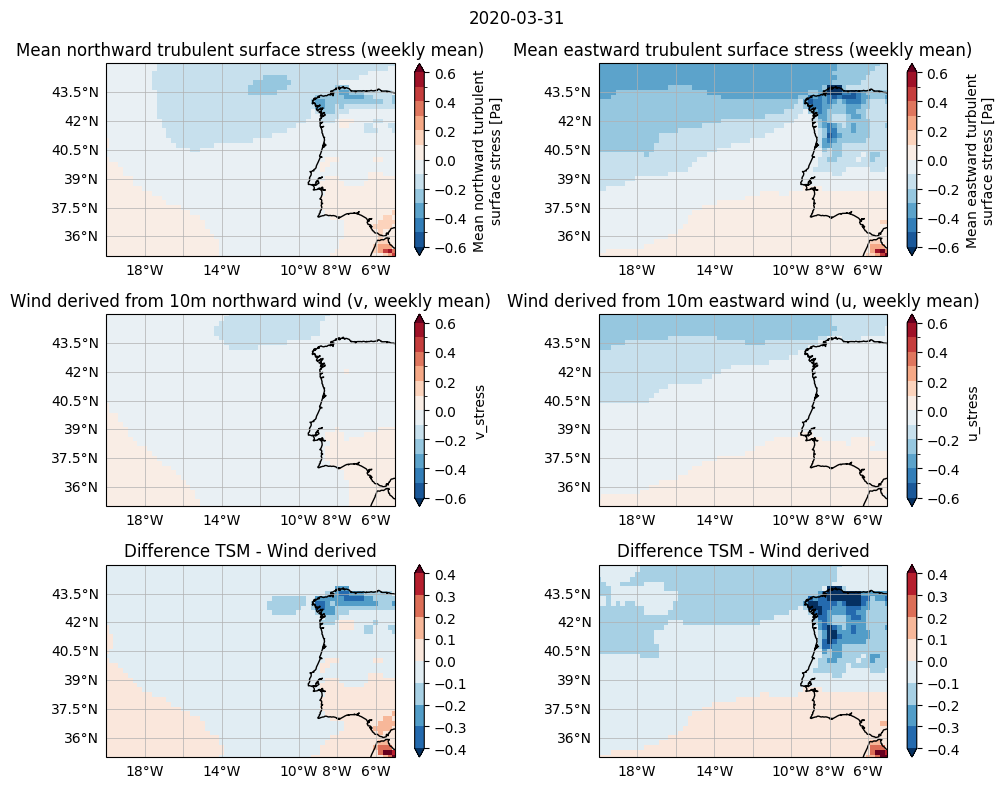

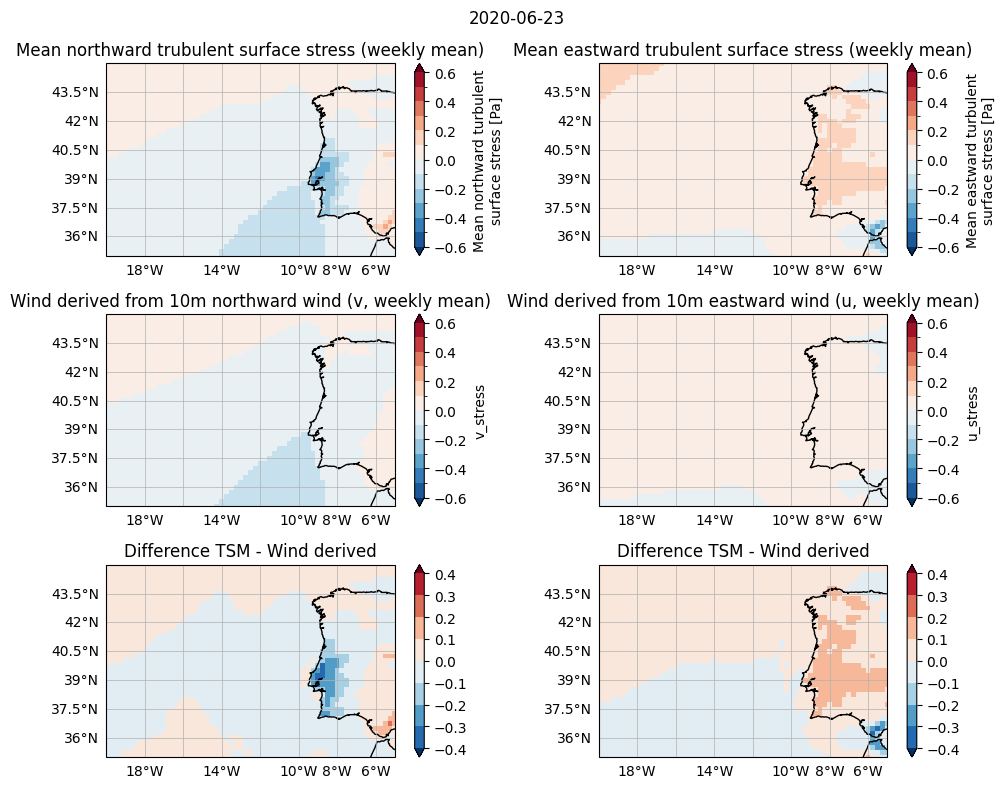

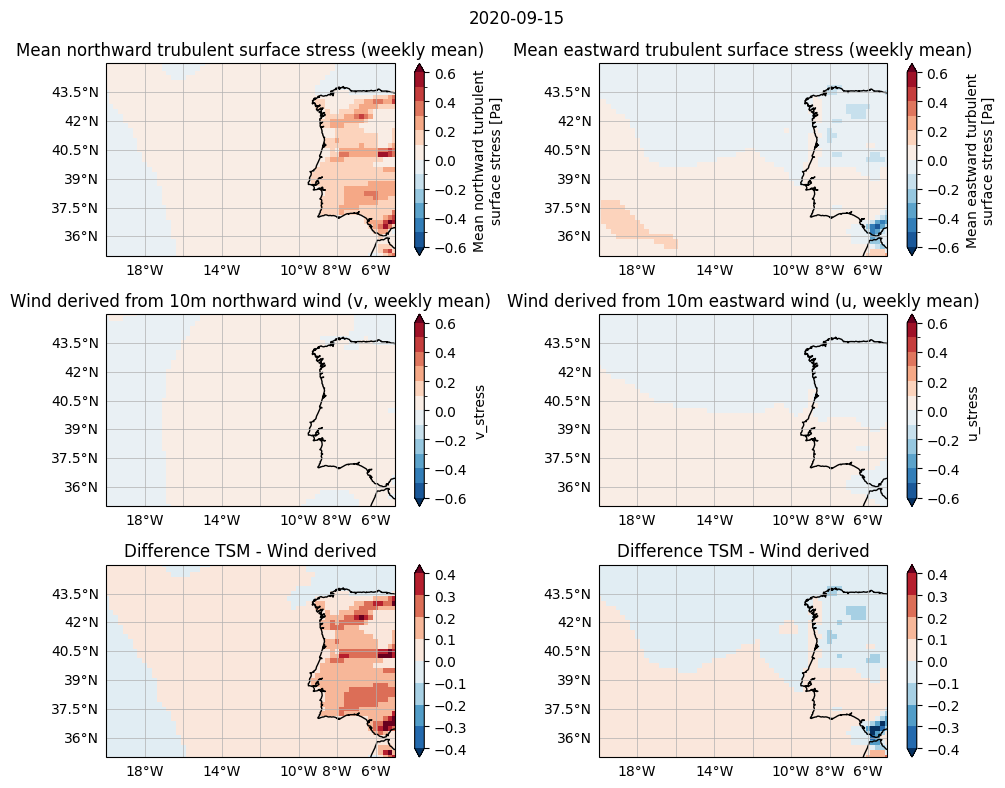

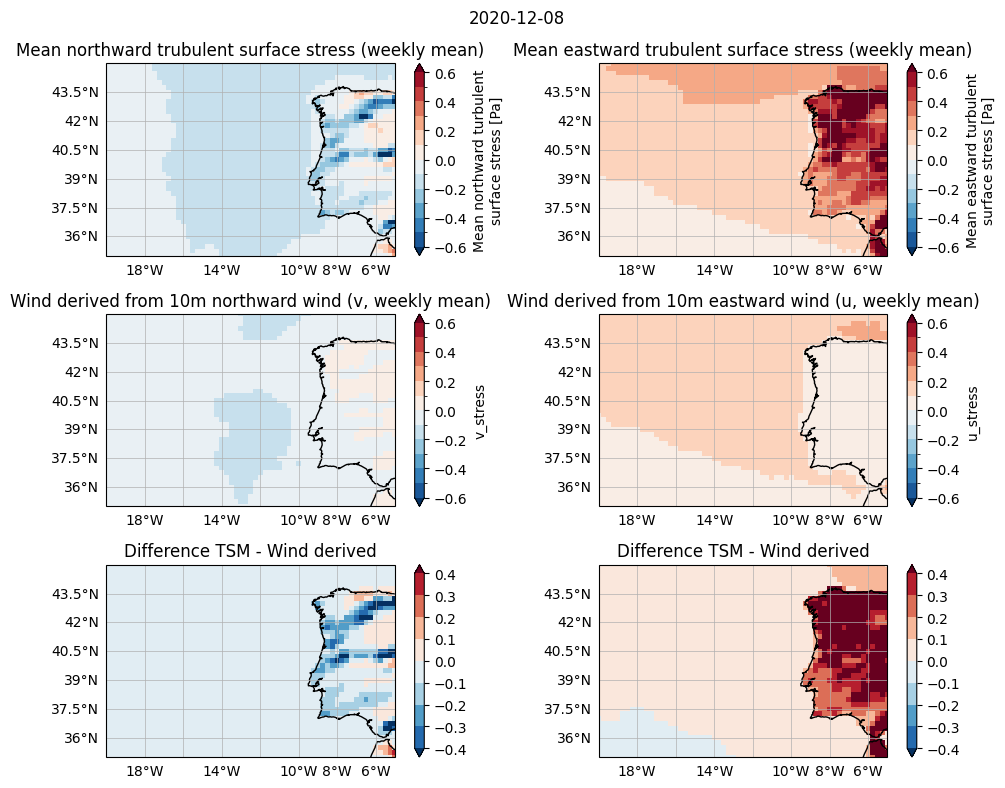

In [43]:
for i in np.arange(0, 53, 12):
    fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = (10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.set_extent([-20, -5, 45, 35])
        ax.coastlines()
        gls = ax.gridlines(draw_labels=True, linewidth = 0.5)
        gls.top_labels = False 
        gls.right_labels = False
        
    MTSS_weekly_mean_20.mntss.isel(time = i).plot(ax = ax1, cmap = 'RdBu_r', levels = np.arange(-0.6, 0.7, 0.1), extend = 'both')
    ax1.set_title('Mean northward trubulent surface stress (weekly mean)')
    MTSS_weekly_mean_20.metss.isel(time = i).plot(ax = ax2, cmap = 'RdBu_r', levels = np.arange(-0.6, 0.7, 0.1), extend = 'both')
    ax2.set_title('Mean eastward trubulent surface stress (weekly mean)')
    Wind10_20_weekly_mean.v_stress.isel(time = i+1).plot(ax = ax3, cmap = 'RdBu_r', levels = np.arange(-0.6, 0.7, 0.1), extend = 'both') # goes back a week if I don't + 1 
    ax3.set_title('Wind derived from 10m northward wind (v, weekly mean)')
    Wind10_20_weekly_mean.u_stress.isel(time = i+1).plot(ax = ax4, cmap = 'RdBu_r', levels = np.arange(-0.6, 0.7, 0.1), extend = 'both') # goes back a week if I don't + 1 
    ax4.set_title('Wind derived from 10m eastward wind (u, weekly mean)')
    
    diff_meridional =  MTSS_weekly_mean_20.mntss.isel(time = i) - Wind10_20_weekly_mean.v_stress.isel(time = i+1)
    diff_zonal = MTSS_weekly_mean_20.metss.isel(time = i) - Wind10_20_weekly_mean.u_stress.isel(time = i+1) 

    diff_meridional.plot(ax = ax5, cmap = 'RdBu_r', levels = np.arange(-0.4, 0.5, 0.1), extend = 'both')
    ax5.set_title('Difference TSM - Wind derived')
    diff_zonal.plot(ax = ax6, cmap = 'RdBu_r', levels = np.arange(-0.4, 0.5, 0.1), extend = 'both')
    ax6.set_title('Difference TSM - Wind derived')

    fig.suptitle(f'{str(Wind10_20_weekly_mean.time.isel(time = i+1).values)[0:10]}')
    fig.tight_layout()

## Anomalies
- 30 year reference period 1982-2011 (including)
- 10 year most recent 2012-2022

In [44]:
MTSS_ref_metss = MTSS_weekly_mean.metss.sel(time = slice('1982-01-05', '2011-12-27')).mean(dim = 'time')
MTSS_ref_mntss = MTSS_weekly_mean.mntss.sel(time = slice('1982-01-05', '2011-12-27')).mean(dim = 'time')

MTSS_decade_metss = MTSS_weekly_mean.metss.sel(time = slice('2012-01-03', '2022-12-27')).mean(dim = 'time')
MTSS_decade_mntss = MTSS_weekly_mean.mntss.sel(time = slice('2012-01-03', '2022-12-27')).mean(dim = 'time')

In [45]:
MTSS_anomaly_metss = MTSS_ref_metss - MTSS_decade_metss
MTSS_anomaly_mntss = MTSS_ref_mntss - MTSS_decade_mntss

In [46]:
magnitude_ref = np.hypot(MTSS_ref_metss, MTSS_ref_mntss)
magnitude_decade = np.hypot(MTSS_decade_metss, MTSS_decade_mntss)
magnitude_anomaly = magnitude_ref - magnitude_decade

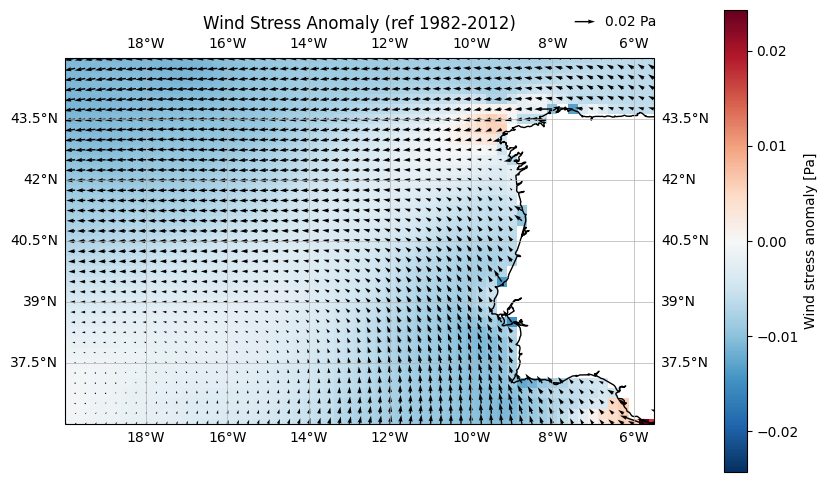

In [73]:
## plot 

plt.figure(figsize=(10, 6))
    
# Set up the map 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-20, -5.5, 45, 36])
ax.gridlines(draw_labels=True, linewidth = 0.5)
ax.coastlines()

# colours for arrows
col = np.hypot(MTSS_anomaly_metss, MTSS_anomaly_mntss)
    
# plot
cp = magnitude_anomaly.where(MTSS_weekly_mean.isel(time = 0).lsm == True).plot(add_colorbar = False)
im = ax.quiver(MTSS_anomaly_metss.lon, MTSS_anomaly_metss.lat, MTSS_anomaly_metss.where(MTSS_weekly_mean.isel(time = 0).lsm == True).values, MTSS_anomaly_mntss.where(MTSS_weekly_mean.isel(time = 0).lsm == True).values, clim = [0,0.025], angles='xy', scale_units='xy', scale=0.04) # col
qk = ax.quiverkey(im, 0.9, 1.1, 0.02, r'0.02 Pa', labelpos='E')
plt.title(f'Wind Stress Anomaly (ref 1982-2012)')
plt.colorbar(cp, ax = ax, label = r'Wind stress anomaly [Pa]', pad = 0.09);

plt.savefig('../Iberian_Coast_Upwelling/Figures/Wind_stress_anomaly.png', dpi = 300)